<a href="https://colab.research.google.com/github/IlyaKonoval/Bank_service/blob/eda_colab/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Создание датасета


## Загрузка данных и импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
clients = pd.read_csv("/content/drive/MyDrive/clients/D_clients.csv")
job = pd.read_csv("/content/drive/MyDrive/clients/D_job.csv")
salary = pd.read_csv("/content/drive/MyDrive/clients/D_salary.csv")
target = pd.read_csv("/content/drive/MyDrive/clients/D_target.csv")
cl_loan = pd.read_csv("/content/drive/MyDrive/clients/D_close_loan.csv")
loan = pd.read_csv("/content/drive/MyDrive/clients/D_loan.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Объединение всех файлов в один датасет

In [ ]:
dataset_client_target = pd.merge(clients, target, left_on='ID', right_on='ID_CLIENT')
dataset_client_target_salary = pd.merge(dataset_client_target, salary, left_on='ID', right_on='ID_CLIENT')
dataset_client_target_salary_job = pd.merge(dataset_client_target_salary, job, left_on='ID', right_on='ID_CLIENT')
dataset_client_target_salary_job.drop('ID_CLIENT_x', axis=1, inplace=True)

Создание таблицы с полной информацией о ссудах

In [ ]:
closed_loans = pd.merge(cl_loan, loan, on='ID_LOAN', how='left')

In [ ]:
closed_loans = closed_loans[closed_loans['CLOSED_FL'] == 1]
loan_closed = closed_loans.groupby('ID_CLIENT').size().reset_index(name='LOAN_NUM_CLOSED')

In [ ]:
loan_total = loan.groupby('ID_CLIENT').size().reset_index(name='LOAN_NUM_TOTAL')

In [ ]:
loan_data = pd.merge(loan_total, loan_closed, on='ID_CLIENT', how='left')
loan_data

,ID_CLIENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106804370,1,1.0
1,106804371,1,1.0
2,106804372,2,1.0
3,106804373,1,1.0
4,106804374,2,1.0
...,...,...,...
15218,106819588,3,2.0
15219,106819589,1,NaN
15220,106819590,1,NaN
15221,106819591,1,NaN


Объединение столбцов клиентов, таргета, зарплаты, работы и ссуд

In [ ]:
dataset_client_target_salary_job_loan = pd.merge(dataset_client_target_salary_job, loan_data, left_on='ID', right_on='ID_CLIENT')
dataset_client_target_salary_job_loan

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,PERSONAL_INCOME,ID_CLIENT_y,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT_x,ID_CLIENT_y,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,...,25000.0,106805103,Другие сферы,Работник сферы услуг,Участие в основ. деятельности,3.0,106805103,106805103,1,NaN
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,...,10000.0,106809308,Торговля,Специалист,Участие в основ. деятельности,5.0,106809308,106809308,1,NaN
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,...,30000.0,106805867,Другие сферы,Руководитель высшего звена,Участие в основ. деятельности,360.0,106805867,106805867,1,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,...,25000.0,106808779,Государственная служба,Специалист,Участие в основ. деятельности,3.0,106808779,106808779,1,NaN
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,...,15000.0,106814289,Другие сферы,Специалист,Участие в основ. деятельности,12.0,106814289,106814289,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,106814680,26,1,Среднее,Не состоял в браке,1,1,1,0,Чувашия,...,8000.0,106814680,Сборочные производства,Специалист,Участие в основ. деятельности,36.0,106814680,106814680,2,2.0
15519,106812464,26,0,Среднее специальное,Состою в браке,0,0,1,0,Карелия,...,12000.0,106812464,Торговля,Специалист,Участие в основ. деятельности,24.0,106812464,106812464,1,NaN
15520,106809255,30,1,Среднее специальное,Не состоял в браке,0,0,1,0,Белгородская область,...,9000.0,106809255,Торговля,Специалист,Участие в основ. деятельности,36.0,106809255,106809255,1,NaN
15521,106814593,25,0,Среднее специальное,Состою в браке,0,0,1,0,Кабардино-Балкария,...,12000.0,106814593,Транспорт,Специалист,Участие в основ. деятельности,36.0,106814593,106814593,1,1.0


Удаляем ненужные колонки

In [ ]:
columns_to_drop = ['EDUCATION', 'MARITAL_STATUS','REG_ADDRESS_PROVINCE', 'ID_CLIENT_x', 'ID_CLIENT_y', 'JOB_DIR', 'WORK_TIME', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FAMILY_INCOME', 'OWN_AUTO','FL_PRESENCE_FL', 'ID','GEN_TITLE', 'GEN_INDUSTRY']
df = dataset_client_target_salary_job_loan.drop(columns_to_drop, axis=1)
df

,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,AGREEMENT_RK,TARGET,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,42,1,1,0,1,0,60099204,1,25000.0,1,NaN
1,28,1,1,1,1,0,62244665,0,10000.0,1,NaN
2,64,0,2,0,1,1,61050759,0,30000.0,1,1.0
3,54,1,0,0,1,0,62079659,0,25000.0,1,NaN
4,26,0,1,1,1,0,66583553,0,15000.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...
15518,26,1,1,1,1,0,66751099,0,8000.0,2,2.0
15519,26,0,0,0,1,0,64562377,0,12000.0,1,NaN
15520,30,1,0,0,1,0,62236542,0,9000.0,1,NaN
15521,25,0,0,0,1,0,66739926,0,12000.0,1,1.0


## Обработка датасета

Всего 7947 пропусков

In [ ]:
df.isnull().sum()

,0
AGE,0
GENDER,0
CHILD_TOTAL,0
DEPENDANTS,0
SOCSTATUS_WORK_FL,0
SOCSTATUS_PENS_FL,0
AGREEMENT_RK,0
TARGET,0
PERSONAL_INCOME,0
LOAN_NUM_TOTAL,0


Заполняем Nan значением 0, т.к ссуда была взята, но не закрыта.

In [ ]:
df['LOAN_NUM_CLOSED'].fillna(0, inplace=True)
df

,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,AGREEMENT_RK,TARGET,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,42,1,1,0,1,0,60099204,1,25000.0,1,0.0
1,28,1,1,1,1,0,62244665,0,10000.0,1,0.0
2,64,0,2,0,1,1,61050759,0,30000.0,1,1.0
3,54,1,0,0,1,0,62079659,0,25000.0,1,0.0
4,26,0,1,1,1,0,66583553,0,15000.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...
15518,26,1,1,1,1,0,66751099,0,8000.0,2,2.0
15519,26,0,0,0,1,0,64562377,0,12000.0,1,0.0
15520,30,1,0,0,1,0,62236542,0,9000.0,1,0.0
15521,25,0,0,0,1,0,66739926,0,12000.0,1,1.0


In [ ]:
new_order = ['AGREEMENT_RK', 'AGE', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'TARGET']
df = df[new_order]
df

,AGREEMENT_RK,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,TARGET
0,60099204,42,1,1,0,25000.0,1,0,1,0.0,1
1,62244665,28,1,1,1,10000.0,1,0,1,0.0,0
2,61050759,64,0,2,0,30000.0,1,1,1,1.0,0
3,62079659,54,1,0,0,25000.0,1,0,1,0.0,0
4,66583553,26,0,1,1,15000.0,1,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
15518,66751099,26,1,1,1,8000.0,1,0,2,2.0,0
15519,64562377,26,0,0,0,12000.0,1,0,1,0.0,0
15520,62236542,30,1,0,0,9000.0,1,0,1,0.0,0
15521,66739926,25,0,0,0,12000.0,1,0,1,1.0,0


In [ ]:
df.isnull().sum()

,0
AGREEMENT_RK,0
AGE,0
GENDER,0
CHILD_TOTAL,0
DEPENDANTS,0
PERSONAL_INCOME,0
SOCSTATUS_WORK_FL,0
SOCSTATUS_PENS_FL,0
LOAN_NUM_TOTAL,0
LOAN_NUM_CLOSED,0


Количество дубликатов в датасете

In [ ]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)


300


In [ ]:
df = df.drop_duplicates()
df

,AGREEMENT_RK,AGE,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,TARGET
0,60099204,42,1,1,0,25000.0,1,0,1,0.0,1
1,62244665,28,1,1,1,10000.0,1,0,1,0.0,0
2,61050759,64,0,2,0,30000.0,1,1,1,1.0,0
3,62079659,54,1,0,0,25000.0,1,0,1,0.0,0
4,66583553,26,0,1,1,15000.0,1,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
15518,66751099,26,1,1,1,8000.0,1,0,2,2.0,0
15519,64562377,26,0,0,0,12000.0,1,0,1,0.0,0
15520,62236542,30,1,0,0,9000.0,1,0,1,0.0,0
15521,66739926,25,0,0,0,12000.0,1,0,1,1.0,0


Адекватные параметры для клиентов:

  1) Персональный доход более 5000

  2) Количество закрытых ссуд не может быть меньше чем общее количество ссуд

In [ ]:
df = df.loc[df.PERSONAL_INCOME >= 5000]

df = df.loc[df.LOAN_NUM_TOTAL >= df.LOAN_NUM_CLOSED]

# Анализ данных


AGREEMENT_RK — уникальный идентификатор объекта в выборке

AGE — возраст клиента

GENDER — пол клиента (1 — мужчина, 0 — женщина)

CHILD_TOTAL — количество детей клиента

DEPENDANTS — количество иждивенцев клиента

PERSONAL_INCOME — личный доход клиента (в рублях)

SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает)

SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер)

LOAN_NUM_TOTAL — количество ссуд клиента;

LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14886 entries, 0 to 15522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGREEMENT_RK       14886 non-null  int64  
 1   AGE                14886 non-null  int64  
 2   GENDER             14886 non-null  int64  
 3   CHILD_TOTAL        14886 non-null  int64  
 4   DEPENDANTS         14886 non-null  int64  
 5   PERSONAL_INCOME    14886 non-null  float64
 6   SOCSTATUS_WORK_FL  14886 non-null  int64  
 7   SOCSTATUS_PENS_FL  14886 non-null  int64  
 8   LOAN_NUM_TOTAL     14886 non-null  int64  
 9   LOAN_NUM_CLOSED    14886 non-null  float64
 10  TARGET             14886 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 1.4 MB


array([[<Axes: title={'center': 'AGREEMENT_RK'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'GENDER'}>],
       [<Axes: title={'center': 'CHILD_TOTAL'}>,
        <Axes: title={'center': 'DEPENDANTS'}>,
        <Axes: title={'center': 'PERSONAL_INCOME'}>],
       [<Axes: title={'center': 'SOCSTATUS_WORK_FL'}>,
        <Axes: title={'center': 'SOCSTATUS_PENS_FL'}>,
        <Axes: title={'center': 'LOAN_NUM_TOTAL'}>],
       [<Axes: title={'center': 'LOAN_NUM_CLOSED'}>,
        <Axes: title={'center': 'TARGET'}>, <Axes: >]], dtype=object)

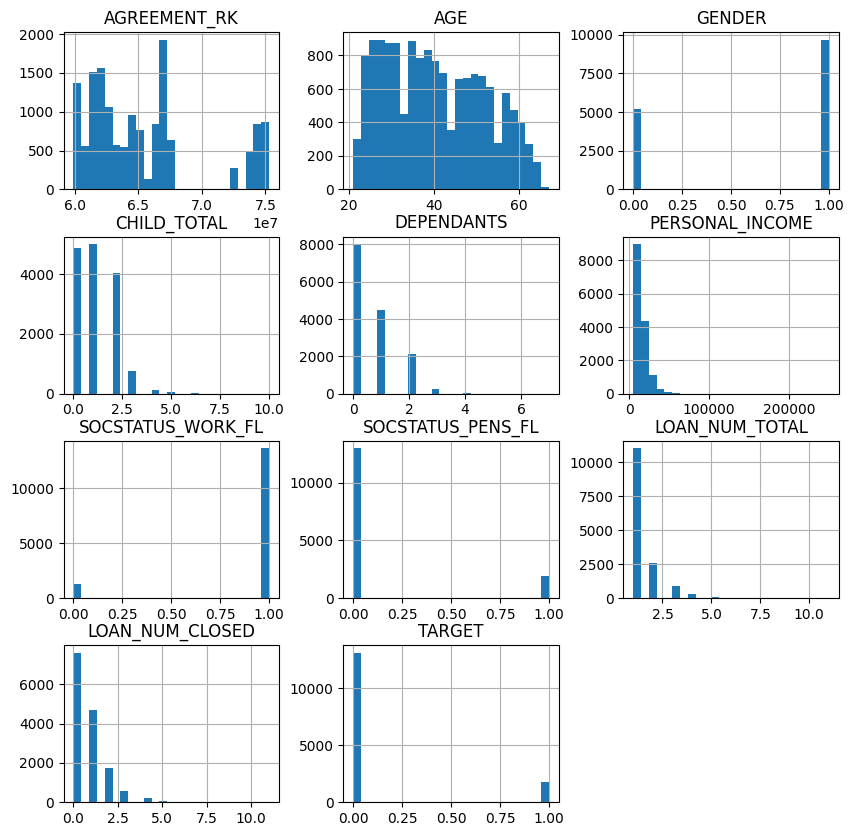

In [ ]:
df.hist(bins=25, figsize= (10,10))

Числовые характеристики числовых столбцов

In [ ]:
categorical_columns = ['GENDER', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'TARGET']
numerical_stats = df.describe()

categorical_stats = df[categorical_columns].describe()

Базовые характеристики параметров

In [ ]:
print("Числовые характеристики:")
print(numerical_stats)

print("\nКатегориальные характеристики:")
print(categorical_stats)

Числовые характеристики:
       AGREEMENT_RK           AGE        GENDER   CHILD_TOTAL    DEPENDANTS  \
count  1.488600e+04  14886.000000  14886.000000  14886.000000  14886.000000   
mean   6.540400e+07     40.292691      0.650074      1.092100      0.647656   
std    4.558042e+06     11.550173      0.476962      0.986191      0.812687   
min    5.991015e+07     21.000000      0.000000      0.000000      0.000000   
25%    6.192373e+07     30.000000      0.000000      0.000000      0.000000   
50%    6.437235e+07     39.000000      1.000000      1.000000      0.000000   
75%    6.709099e+07     50.000000      1.000000      2.000000      1.000000   
max    7.529224e+07     67.000000      1.000000     10.000000      7.000000   

       PERSONAL_INCOME  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  LOAN_NUM_TOTAL  \
count     14886.000000       14886.000000       14886.000000    14886.000000   
mean      14073.268934           0.916230           0.128712        1.389225   
std        8996.481057 

## Однофакторный анализ числовых признаков


### Возраст

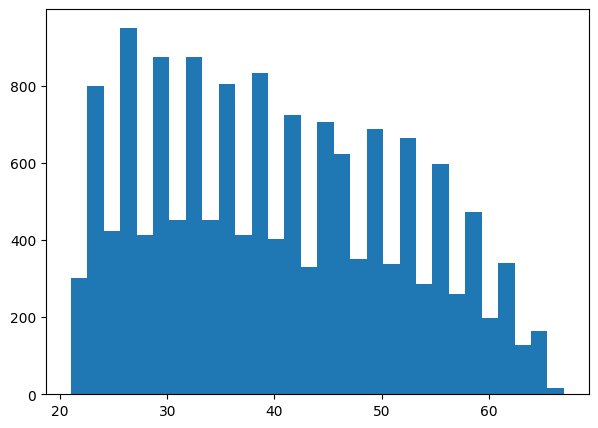

In [ ]:
plt.figure(figsize=(7,5))

plt.hist(df.AGE, bins=30);

Основное количество людей ,бравших кредиты, старше 30 лет

In [ ]:
len(df[df.AGE > 30])/ len(df)

0.7473465000671772

Средний возраст - 40 лет


In [ ]:
df.AGE.mean()

40.292691119172375

Наибольший возраст 67 лет, наименьший - 21 год

In [ ]:
print(df.AGE.max())
print(df.AGE.min())

67
21


По графику можно сказать, что возраст не влияет на то откликнутся ли клиенты.


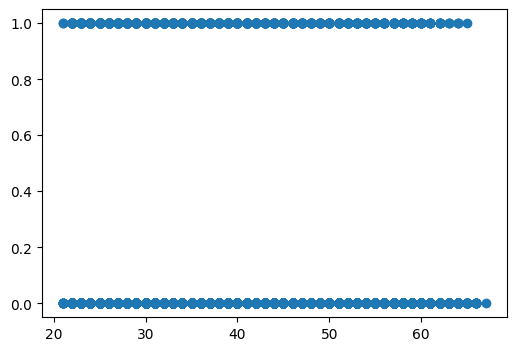

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.AGE, df.TARGET);

Это подтвержается корреляцией

In [ ]:
np.corrcoef(df.AGE, df.TARGET)[0][1]

-0.1032134226917807

### Персональный доход


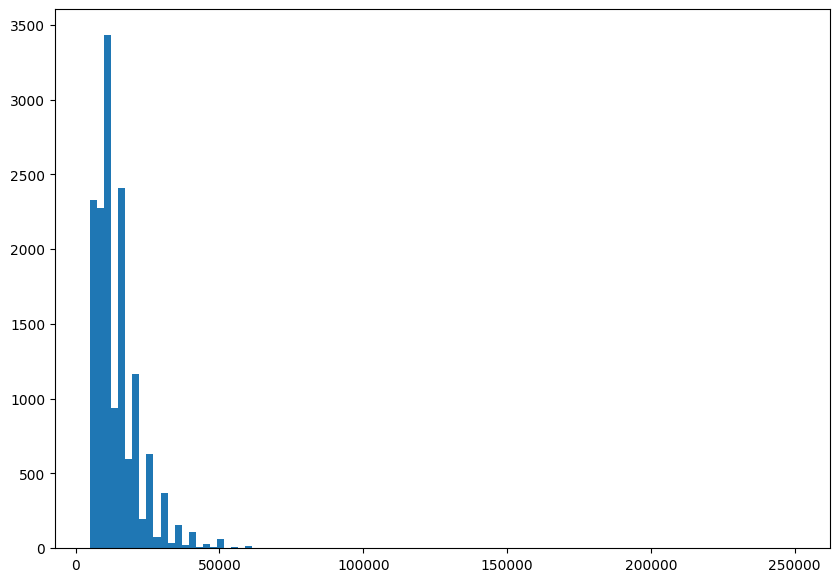

In [ ]:
plt.figure(figsize=(10,7))

plt.hist(df.PERSONAL_INCOME, bins=100);

Средний доход составляет 14073 рублей

In [ ]:
df.PERSONAL_INCOME.mean()

14073.268933897622

Наибольший доход - 250000 рублей
Наименьший доход - 5000 рублей

In [ ]:
print(df.PERSONAL_INCOME.max())
print(df.PERSONAL_INCOME.min())

250000.0
5000.0


Наименьший персональных доход имеют как ни странно имеют люди старше 60 лет

In [ ]:
df.groupby(["AGE"]).agg(IncomeMean=('PERSONAL_INCOME','mean')).sort_values(by='IncomeMean', ascending=True)

,IncomeMean
AGE,
65,8893.023256
63,9674.412326
64,11149.305785
61,11414.974874
62,11491.373239
60,11820.700508
67,12000.000000
59,12119.038835
58,12387.406015


Отклик клиентов на маркетинговую компанию не коррелирует с личным доходом.


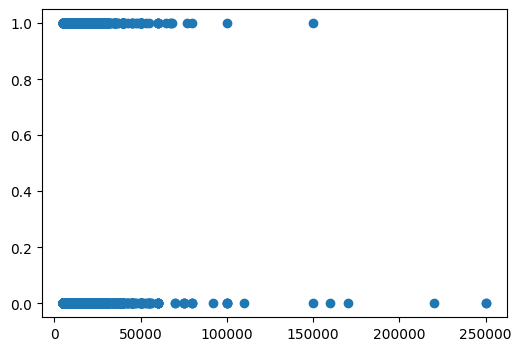

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.PERSONAL_INCOME, df.TARGET);

In [ ]:
np.corrcoef(df.PERSONAL_INCOME, df.TARGET)[0][1]

0.0943132501128487

### Дети

(array([4.887e+03, 0.000e+00, 5.008e+03, 0.000e+00, 4.025e+03, 0.000e+00,
        7.690e+02, 0.000e+00, 1.240e+02, 0.000e+00, 5.500e+01, 0.000e+00,
        1.200e+01, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

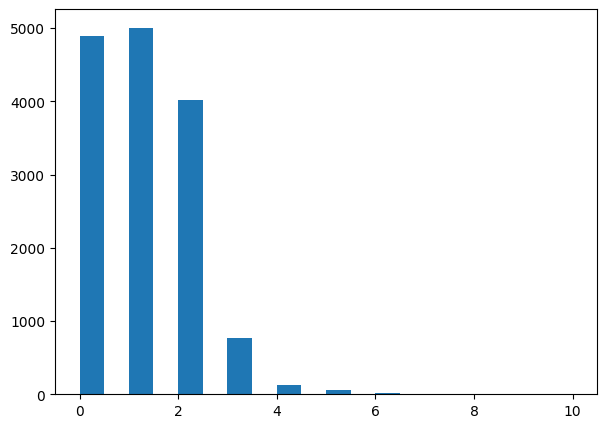

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(df.CHILD_TOTAL, bins=20)

Всего 32.8% не имеют детей

In [ ]:
len(df[df.CHILD_TOTAL == 0])/ len(df)

0.3282950423216445

Количество детей сильно коррелирует с количеством иждевенцев у клиента.

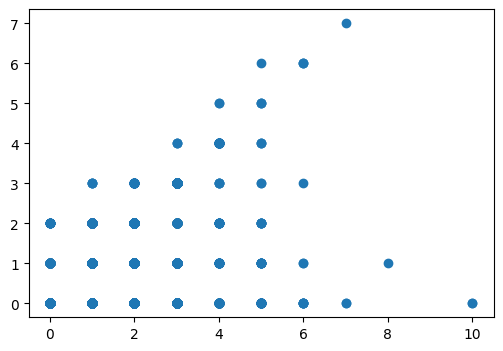

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.CHILD_TOTAL, df.DEPENDANTS);

In [ ]:
np.corrcoef(df.CHILD_TOTAL, df.DEPENDANTS)[0][1]

0.5186227494670411

Количество детей клиента не коррелирует с наличием отклика на маркетинговую компанию

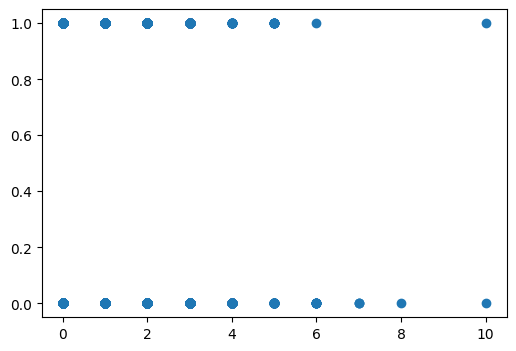

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(df.CHILD_TOTAL, df.TARGET);


In [ ]:
np.corrcoef(df.CHILD_TOTAL, df.TARGET)[0][1]

0.010886295417815302

### Количество ссуд

(array([1.1036e+04, 0.0000e+00, 2.5680e+03, 0.0000e+00, 8.5500e+02,
        0.0000e+00, 2.7100e+02, 0.0000e+00, 1.0200e+02, 0.0000e+00,
        3.6000e+01, 0.0000e+00, 1.4000e+01, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ]),
 <BarContainer object of 20 artists>)

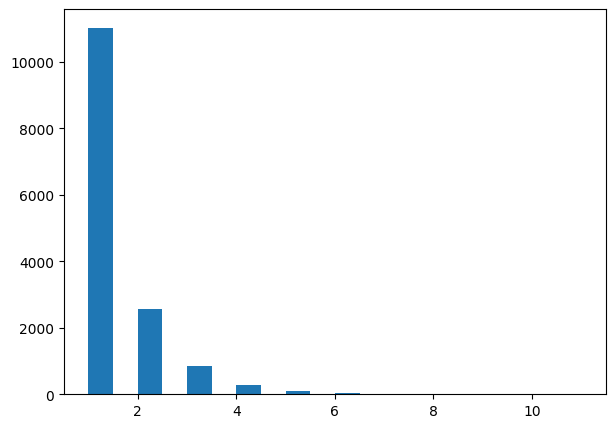

In [ ]:
plt.figure(figsize=(7, 5))
plt.hist(df.LOAN_NUM_TOTAL, bins=20)

74% клиентов имеют только 1 кредит, что не позволяет адекватно оценить зависимость таргета от этого признака

In [ ]:
len(df[df.LOAN_NUM_TOTAL == 1])/ len(df)

0.7413677280666398

Наибольшее количество ссуд у одного клиента - 11

In [ ]:
df.LOAN_NUM_TOTAL.max()

11

## Однофакторный анализ категориальных признаков

### Пол клиента

Преимущественно кредиты берут мужчины

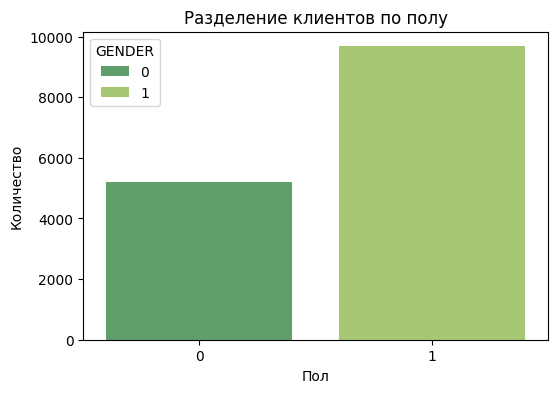

GENDER
1    9677
0    5209
Name: count, dtype: int64


In [ ]:
gender_clients = df['GENDER'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=gender_clients.index, y=gender_clients.values, hue=gender_clients.index, palette='summer')
plt.title('Разделение клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

print(gender_clients)

У женщин в среднем выше персональный доход

In [ ]:
df.groupby('GENDER').agg(IncomeMean=('PERSONAL_INCOME','mean')).sort_values(by='IncomeMean', ascending=False)

,IncomeMean
GENDER,
0,16930.624911
1,12535.192331


Женщины чуть чаще дают отклик на маркетинговую компанию

<ipython-input-171-5d6188930d70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GENDER', y='TARGET', data=df, estimator=lambda x: sum(x) / len(x), palette='summer')


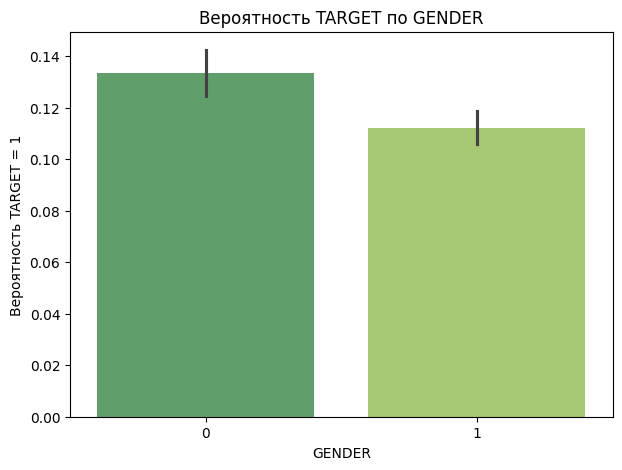

In [ ]:
plt.figure(figsize=(7, 5))

sns.barplot(x='GENDER', y='TARGET', data=df, estimator=lambda x: sum(x) / len(x), palette='summer')
plt.title('Вероятность TARGET по GENDER')
plt.xlabel('GENDER')
plt.ylabel('Вероятность TARGET = 1')
plt.show()

### Социальный статус клиента относительно работы

Подавляющее большинство клиентов работают.

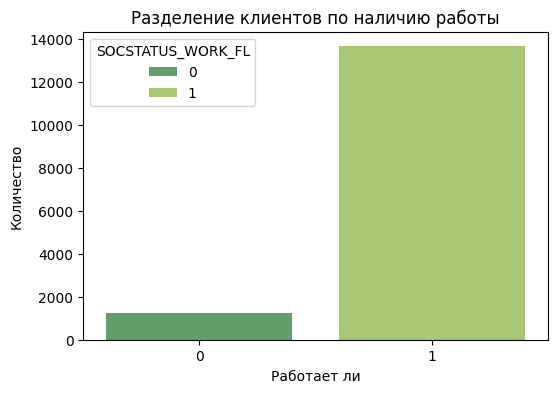

SOCSTATUS_WORK_FL
1    13639
0     1247
Name: count, dtype: int64


In [ ]:
work_clients = df['SOCSTATUS_WORK_FL'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=work_clients.index, y=work_clients.values, hue=work_clients.index, palette='summer')
plt.title('Разделение клиентов по наличию работы')
plt.xlabel('Работает ли')
plt.ylabel('Количество')
plt.show()

print(work_clients)

Люди с работой имеют в среднем больший доход

In [ ]:
df.groupby('SOCSTATUS_WORK_FL').agg(IncomeMean=('PERSONAL_INCOME','mean')).sort_values(by='IncomeMean', ascending=False)

,IncomeMean
SOCSTATUS_WORK_FL,
1,14571.875736
0,8619.782029


Работающие клиенты дают отклик на много чаще, чем не работающие

<ipython-input-174-1434916e1963>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SOCSTATUS_WORK_FL', y='TARGET', data=df, estimator=lambda x: sum(x) / len(x), palette='summer')


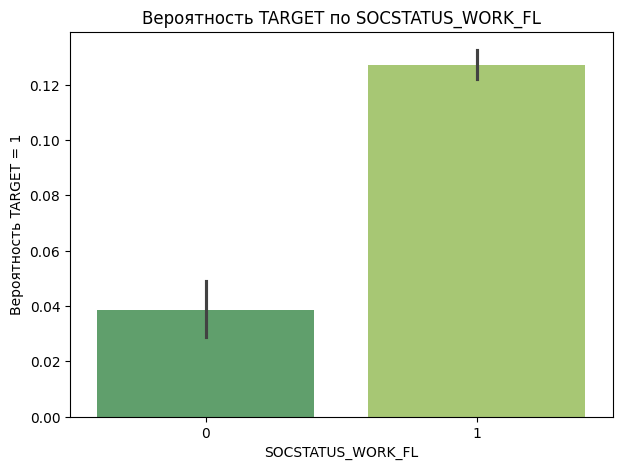

In [ ]:
plt.figure(figsize=(7, 5))

sns.barplot(x='SOCSTATUS_WORK_FL', y='TARGET', data=df, estimator=lambda x: sum(x) / len(x), palette='summer')
plt.title('Вероятность TARGET по SOCSTATUS_WORK_FL')
plt.xlabel('SOCSTATUS_WORK_FL')
plt.ylabel('Вероятность TARGET = 1')
plt.show()

### Социальный статус клиента относительно пенсии

Большинство клиентов не на пенсии

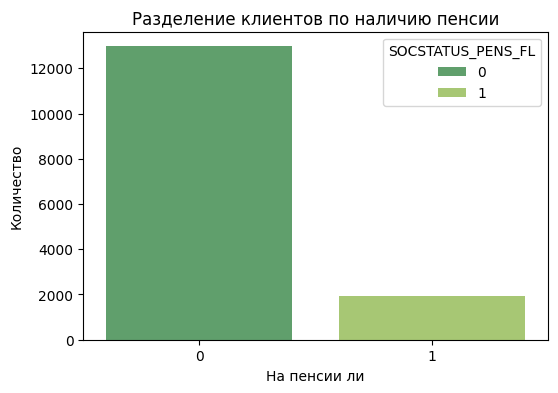

SOCSTATUS_PENS_FL
0    12970
1     1916
Name: count, dtype: int64


In [ ]:
pens_clients = df['SOCSTATUS_PENS_FL'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=pens_clients.index, y=pens_clients.values, hue=pens_clients.index, palette='summer')
plt.title('Разделение клиентов по наличию пенсии')
plt.xlabel('На пенсии ли')
plt.ylabel('Количество')
plt.show()

print(pens_clients)

Большинство клиентов-пенсионеров являются мужчинами

GENDER  SOCSTATUS_PENS_FL
0       0                    4856
        1                     353
1       0                    8114
        1                    1563
Name: count, dtype: int64


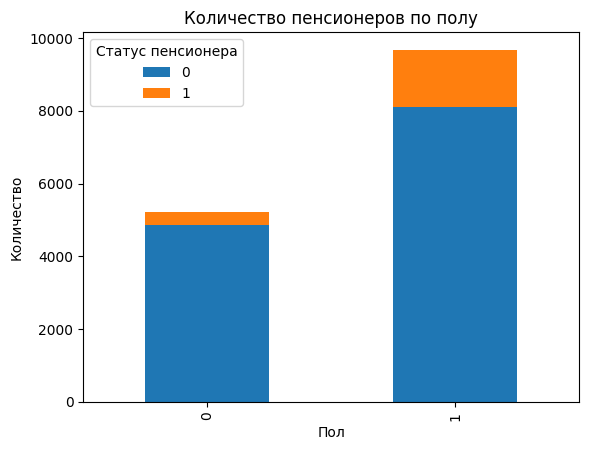

In [ ]:
pens_by_gender = df.groupby('GENDER')['SOCSTATUS_PENS_FL'].value_counts()
print(pens_by_gender)

pens_by_gender = pd.crosstab(df['GENDER'], df['SOCSTATUS_PENS_FL'])
pens_by_gender.plot(kind='bar', stacked=True)
plt.title('Количество пенсионеров по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Статус пенсионера')
plt.show()

Пенсионеры реже оставляли отклики, чем работающие.

<ipython-input-177-2009e184bdbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SOCSTATUS_PENS_FL', y='TARGET', data=df, estimator=lambda x: sum(x) / len(x), palette='summer')


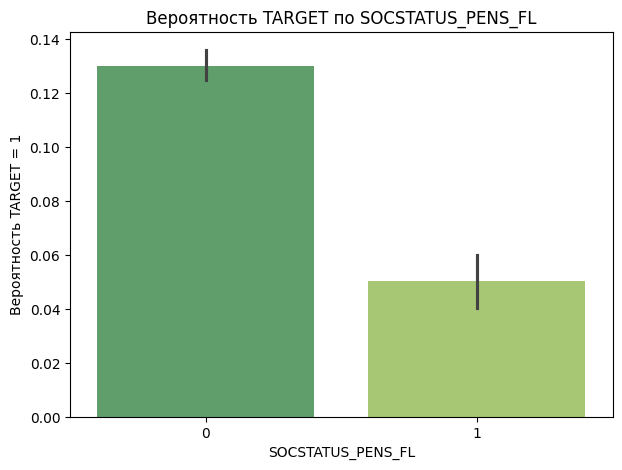

In [ ]:
plt.figure(figsize=(7, 5))

sns.barplot(x='SOCSTATUS_PENS_FL', y='TARGET', data=df, estimator=lambda x: sum(x) / len(x), palette='summer')
plt.title('Вероятность TARGET по SOCSTATUS_PENS_FL')
plt.xlabel('SOCSTATUS_PENS_FL')
plt.ylabel('Вероятность TARGET = 1')
plt.show()

## Корреляционный анализ

### Корреляция Пирсона

По матрице корреляций мы видим что больше всего TARGET коррелирует с AGE, PERSONAL_INCOME, SOCSTATUS_WORK, SOCSTATUS_PENS, с остальными параметрами корреляция менее заметна

                   AGREEMENT_RK       AGE    GENDER  CHILD_TOTAL  DEPENDANTS  \
AGREEMENT_RK           1.000000 -0.012560  0.050914     0.009372    0.019501   
AGE                   -0.012560  1.000000  0.144871     0.210184   -0.278433   
GENDER                 0.050914  0.144871  1.000000     0.047525   -0.083949   
CHILD_TOTAL            0.009372  0.210184  0.047525     1.000000    0.518623   
DEPENDANTS             0.019501 -0.278433 -0.083949     0.518623    1.000000   
PERSONAL_INCOME       -0.035313 -0.081767 -0.233031    -0.047188    0.032397   
SOCSTATUS_WORK_FL     -0.033343 -0.441658 -0.102370    -0.034953    0.192342   
SOCSTATUS_PENS_FL      0.026965  0.554731  0.133521     0.054625   -0.242625   
LOAN_NUM_TOTAL         0.322135  0.023786  0.009273     0.034906    0.053156   
LOAN_NUM_CLOSED        0.298701 -0.001654  0.011148     0.004635    0.040947   
TARGET                 0.003857 -0.103213 -0.030993     0.010886    0.051662   

                   PERSONAL_INCOME  SOC

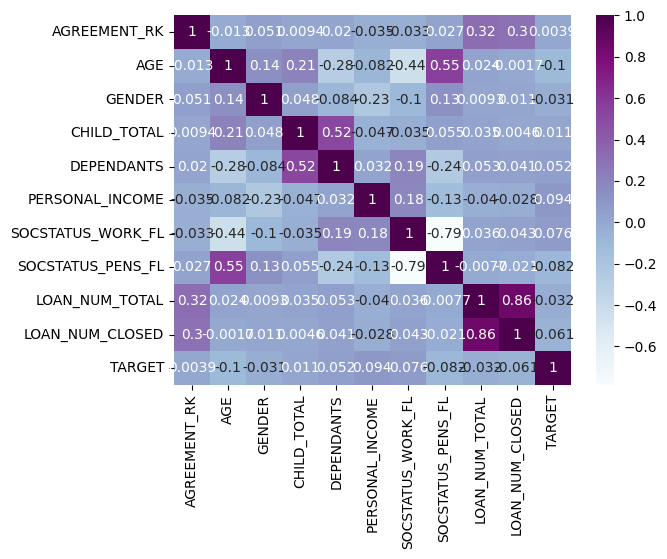

In [ ]:
corr_mat = df.corr()

sns.heatmap(corr_mat, cmap='BuPu', annot=True)

print(corr_mat)

### Корреляция Спирмена

Наиболее коррелированные признаки остались те же, но корреляция с количеством детей сильно уменьшилась, а с иждевенцами чуть-чуть выросла. Что не сильно влияет на итоговый анализ

                   AGREEMENT_RK       AGE    GENDER  CHILD_TOTAL  DEPENDANTS  \
AGREEMENT_RK           1.000000 -0.038812  0.051213     0.005500    0.029333   
AGE                   -0.038812  1.000000  0.142589     0.212676   -0.286500   
GENDER                 0.051213  0.142589  1.000000     0.047810   -0.079993   
CHILD_TOTAL            0.005500  0.212676  0.047810     1.000000    0.524095   
DEPENDANTS             0.029333 -0.286500 -0.079993     0.524095    1.000000   
PERSONAL_INCOME       -0.017293 -0.127548 -0.284831    -0.053732    0.050783   
SOCSTATUS_WORK_FL     -0.018412 -0.406939 -0.102370    -0.010626    0.214574   
SOCSTATUS_PENS_FL      0.016102  0.514009  0.133521     0.024972   -0.269639   
LOAN_NUM_TOTAL         0.392479  0.037467  0.018603     0.041575    0.060422   
LOAN_NUM_CLOSED        0.311436 -0.013248  0.020440    -0.004177    0.039429   
TARGET                 0.007226 -0.100138 -0.030993     0.005574    0.045710   

                   PERSONAL_INCOME  SOC

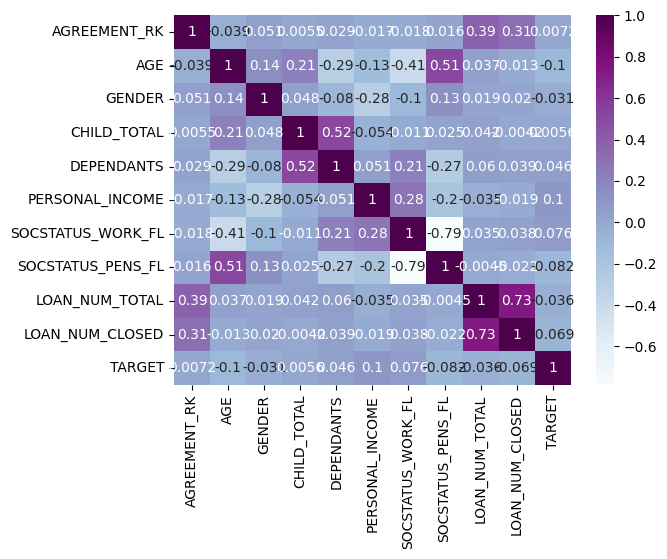

In [ ]:
corr_mat = df.corr(method='spearman')

sns.heatmap(corr_mat, cmap='BuPu', annot=True)

print(corr_mat)

## Анализ целевой переменной

Отклик на маркетинговую компанию дали только 12% клиентов, что не может
 не удручать.

<Axes: xlabel='TARGET', ylabel='Count'>

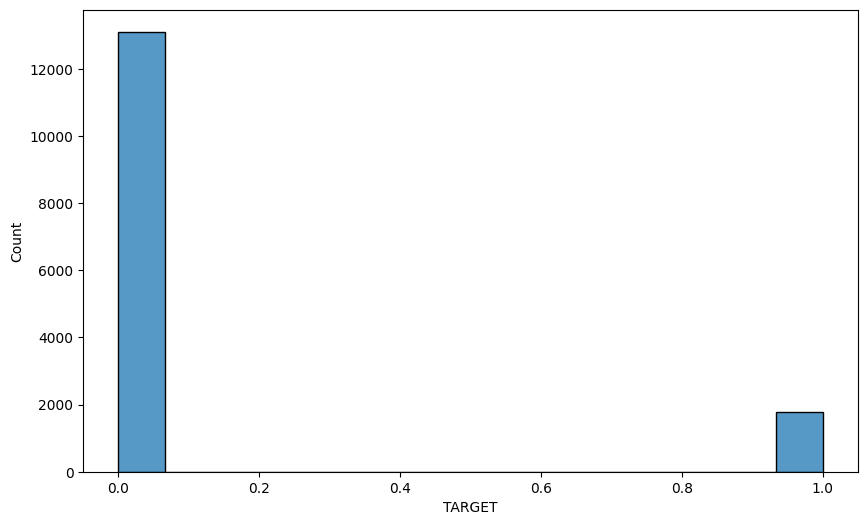

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df['TARGET'])

In [ ]:
len(df[df.TARGET == 1])/ len(df)

0.11970979443772672